In [1]:
import scipy.ndimage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from os import listdir
import os
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler  
import numpy
numpy.set_printoptions(threshold=numpy.nan)
%matplotlib inline

In [2]:
def get_label(path):
    return int(path.split('/')[-1].split('_')[0])

number = input()  
source_path = "C:/Users/tomas.chladek/Documents/Personal/Uni/Master/3rd/ROZ/irises_red_normalized" + str(number) + "/"
onlyfiles = [f for f in listdir(source_path)]

11


In [3]:
def get_classifier(image):
    classifier = []
    for column in range(0,300):
        counter = 0
        for row in range(0,100):
            if image[row,column] > 0:
                counter += 1
        classifier.append(counter)
    return classifier

In [4]:
dataset = []
labels = []
data = []
for fileName in onlyfiles:
    img = mpimg.imread(source_path + fileName)
    image_processed = np.abs(img[:,:,2]-1)
    classifier = get_classifier(image_processed)
    label = get_label(fileName)
    labels.append(label)
    data.append(classifier)
    dataset.append([label,classifier])

In [5]:
len(labels)

813

In [9]:
data_train, data_test, labels_train, labels_test = train_test_split(data[:], labels[:], test_size=0.30)  
classifier = KNeighborsClassifier(n_neighbors=1)  
classifier.fit(data_train, labels_train)
labels_pred = classifier.predict(data_test) 
print(classification_report(labels_test, labels_pred))  

              precision    recall  f1-score   support

           1       0.40      0.67      0.50         6
           2       0.25      0.20      0.22         5
           3       0.36      0.80      0.50         5
           4       0.33      0.25      0.29         4
           5       1.00      0.67      0.80         3
           6       1.00      0.50      0.67         2
           8       0.22      0.67      0.33         3
          10       1.00      0.50      0.67         4
          11       0.33      0.60      0.43         5
          12       0.80      0.80      0.80         5
          13       1.00      0.50      0.67         4
          14       0.50      1.00      0.67         1
          15       0.57      0.80      0.67         5
          16       0.43      0.60      0.50         5
          17       0.25      0.50      0.33         2
          18       1.00      1.00      1.00         1
          19       0.67      1.00      0.80         2
          20       0.00    

C:\Users\tomas.chladek\Documents\Personal\Uni\Master\3rd\ROZ\irisClassifier\__venv__\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tomas.chladek\Documents\Personal\Uni\Master\3rd\ROZ\irisClassifier\__venv__\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [7]:
print(confusion_matrix(labels_test, labels_pred))

[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  1]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 3 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0]
 [1 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 

Text(0, 0.5, 'Mean Error')

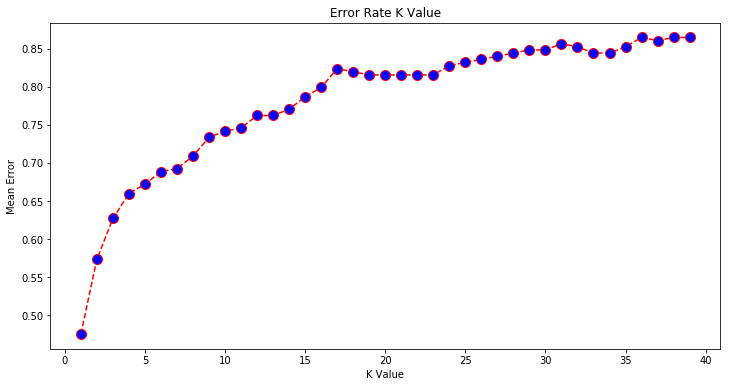

In [8]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data_train, labels_train)
    pred_i = knn.predict(data_test)
    error.append(np.mean(pred_i != labels_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  